# Project 3: Recommendation Systems

## Group Members
- Shaira Alam

- Vani Agrawal 

- Dhakshina Ilango

# Question 7
Understanding the NMF cost function: Is the optimization problem given by equation 5 convex? Consider the optimization problem given by equation 5. For U fixed, formulate it as a least-squares problem.

# Question 8
Designing the NMF Collaborative Filter

## A
Design a NMF-based collaborative filter to predict the ratings of the movies in the original dataset and evaluate its performance using 10-fold cross-validation. Sweep k (number of latent factors) from 2 to 50 in step sizes of 2, and for each k compute the average RMSE and average MAE obtained by averaging the RMSE and MAE across all 10 folds. If NMF takes too long, you can increase the step size. Increasing it too much will result in poorer granularity in your results. Plot the average RMSE (Y-axis) against k (X-axis) and the average MAE (Yaxis) against k (X-axis). For solving this question, use the default value for the regularization parameter.

## B
Use the plot from the previous part to find the optimal number of latent factors. Optimal number of latent factors is the value of k that gives the minimum average RMSE or the minimum average MAE. Please report the minimum average RMSE and MAE. Is the optimal number of latent factors same as the number of movie genres?

## C
Performance on trimmed dataset subsets: For each of Popular, Unpopular and High-Variance subsets

Design a NMF collaborative filter for each trimmed subset and evaluate its performance using 10-fold cross validation. Sweep k (number of latent factors) from 2 to 50 in step sizes of 2, and for each k compute the average RMSE obtained by averaging the RMSE across all 10 folds.

Plot average RMSE (Y-axis) against k (X-axis); item Report the minimum average RMSE.

## D
Plot the ROC curves for the NMF-based collaborative filter and also report the area under the curve (AUC) value as done in Question 6.

# Question 9
Interpreting the NMF model: Perform Non-negative matrix factorization on
the ratings matrix R to obtain the factor matrices U and V , where U represents the user-latent factors interaction and V represents the movie-latent factors interaction (use k = 20). For each column of V , sort the movies in descending order and report the genres of the top 10 movies. Do the top 10 movies belong to a particular or a small collection of genre? Is there a connection between the latent factors and the movie genres?

# Question 10
Designing the MF Collaborative Filter

## A
Design a MF-based collaborative filter to predict the ratings of the movies in the original dataset and evaluate it’s performance using 10-fold cross-validation. Sweep k (number of latent factors) from 2 to 50 in step sizes of 2, and for each k compute the average RMSE and average MAE obtained by averaging the RMSE and MAE across all 10 folds. Plot the average RMSE (Y-axis) against k (X-axis) and the average MAE (Y-axis) against k (X-axis). For solving this question, use the default value for the regularization parameter.

## B
Use the plot from the previous part to find the optimal number of latent factors. Optimal
number of latent factors is the value of k that gives the minimum average RMSE or the
minimum average MAE. Please report the minimum average RMSE and MAE. Is the optimal
number of latent factors same as the number of movie genres?

## C
Performance on dataset subsets: For each of Popular, Unpopular and High-Variance subsets

Design a MF collaborative filter for each trimmed subset and evaluate its performance using 10-fold cross validation. Sweep k (number of latent factors) from 2 to 50 in step sizes of 2, and for each k compute the average RMSE obtained by averaging the RMSE across all 10 folds.

Plot average RMSE (Y-axis) against k (X-axis); item Report the minimum average RMSE.

Plot the ROC curves for the MF-based collaborative filter and also report the area under the curve (AUC) value as done in Question 6.

# Question 11

## A
Design a naive collaborative filter to predict the ratings of the movies in the original dataset and evaluate it’s performance using 10-fold cross validation. Compute the average RMSE by averaging the RMSE across all 10 folds. Report the average RMSE.

## B
Performance on dataset subsets: For each of Popular, Unpopular and High-Variance test subsets 

Design a naive collaborative filter for each trimmed set and evaluate its performance using 10-fold cross validation.

Compute the average RMSE by averaging the RMSE across all 10 folds. Report the average RMSE.

# Question 12 
Comparing the most performant models across architecture: Plot the best ROC curves (threshold = 3) for the k-NN, NMF, and MF with bias based  ollaborative filters in the same figure. Use the figure to compare the performance of the filters in predicting the ratings of the movies.

# Question 13 
Use the provided helper code for loading and preprocessing Web10k data. Print out the number of unique queries in total and show distribution of relevance labels.

In [1]:
! pip install lightgbm

In [2]:
from sklearn.datasets import load_svmlight_file
from sklearn.metrics import ndcg_score
import numpy as np

# Load the dataset for one fold
def load_one_fole(data_path):
    X_train, y_train, qid_train = load_svmlight_file(str(data_path + 'train.txt'), query_id=True)
    X_test, y_test, qid_test = load_svmlight_file(str(data_path + 'test.txt'), query_id=True)
    y_train = y_train.astype(int)
    y_test = y_test.astype(int)
    _, group_train = np.unique(qid_train, return_counts=True)
    _, group_test = np.unique(qid_test, return_counts=True)
    return X_train, y_train, qid_train, group_train, X_test, y_test, qid_test, group_test

def ndcg_single_query(y_score, y_true, k):
    order = np.argsort(y_score)[::-1]
    y_true = np.take(y_true, order[:k])

    gain = 2 ** y_true - 1

    discounts = np.log2(np.arange(len(y_true)) + 2)
    return np.sum(gain / discounts)

# calculate NDCG score given a trained model 
def compute_ndcg_all(model, X_test, y_test, qids_test, k=10):
    unique_qids = np.unique(qids_test)
    ndcg_ = list()
    for i, qid in enumerate(unique_qids):
        y = y_test[qids_test == qid]

        if np.sum(y) == 0:
            continue

        p = model.predict(X_test[qids_test == qid])

        idcg = ndcg_single_query(y, y, k=k)
        ndcg_.append(ndcg_single_query(p, y, k=k) / idcg)
    return np.mean(ndcg_)

# get importance of features
def get_feature_importance(model, importance_type='gain'):
    return model.booster_.feature_importance(importance_type=importance_type)

Fold1: val:[0 1 2 3 4] count:[502741 310465 127541  17108   7078]
Fold2: val:[0 1 2 3 4] count:[499479 308384 126992  16867   6949]
Fold3: val:[0 1 2 3 4] count:[497813 308264 127576  17264   7287]
Fold4: val:[0 1 2 3 4] count:[498175 310318 128538  16956   7112]
Fold5: val:[0 1 2 3 4] count:[498844 307689 127157  17073   7098]


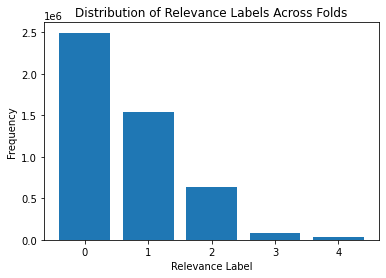

In [3]:
import os
import matplotlib.pyplot as plt

datapath = './MSLR-WEB10K'

total_counts = np.zeros(5, dtype=int)

# Loop through each fold
for fold_num in range(1, 6):
    # Load data for the current fold
    fold_path = os.path.join(datapath, f'Fold{fold_num}/')
    _, y_train, _, _, _, y_test, _, _ = load_one_fole(fold_path)

    # Calculate and print distribution of relevance labels for the current fold
    unique_labels, label_counts = np.unique(np.concatenate([y_train, y_test]), return_counts=True)
    print(f'Fold{fold_num}: val:{unique_labels} count:{label_counts}')

    # Update total counts
    total_counts += label_counts

# Combine counts across all folds into a single plot
relevance_labels = [0, 1, 2, 3, 4]

# Plot the total frequency of relevance labels
plt.bar(relevance_labels, total_counts)
plt.xlabel('Relevance Label')
plt.ylabel('Frequency')
plt.title('Distribution of Relevance Labels Across Folds')
plt.show()

In [4]:
# Print the combined counts
print("\nCombined counts across all folds:")
print("relevance label:  0                 1                  2                 3               4")
print(f"frequency:      {total_counts[0]}         {total_counts[1]}              {total_counts[2]}            {total_counts[3]}           {total_counts[4]}")


Combined counts across all folds:
relevance label:  0                 1                  2                 3               4
frequency:      2497052         1545120              637804            85268           35524


# Question 14
For each of the five provided folds, train a LightGBM model using the ’lambdarank’ objective. After
training, evaluate and report the model’s performance on the test set using nDCG@3, nDCG@5 and
nDCG@10

In [6]:
import lightgbm as lgb

datapath = './MSLR-WEB10K'

results = []

for fold_num in range(1, 6):
    # Load data for the current fold
    fold_path = os.path.join(datapath, f'Fold{fold_num}/')
    X_train, y_train, qid_train, group_train, X_test, y_test, qid_test, group_test = load_one_fole(fold_path)

    # LightGBM model with 'lambdarank' objective
    params = {'objective': 'lambdarank', 'metric': 'ndcg', 'ndcg_eval_at': [3, 5, 10], 'verbose': 0}
    fold_train_data = lgb.Dataset(X_train, label=y_train, group=group_train, free_raw_data=False)
    fold_test_data = lgb.Dataset(X_test, label=y_test, group=group_test, free_raw_data=False)

    lgb_model = lgb.train(params, fold_train_data, valid_sets=[fold_test_data])

    # Evalauting the model on the test set
    ndcg3 = compute_ndcg_all(lgb_model, X_test, y_test, qid_test, k=3)
    ndcg5 = compute_ndcg_all(lgb_model, X_test, y_test, qid_test, k=5)
    ndcg10 = compute_ndcg_all(lgb_model, X_test, y_test, qid_test, k=10)

    results.append({'fold': fold_num, 'ndcg@3': ndcg3, 'ndcg@5': ndcg5, 'ndcg@10': ndcg10})

print("\nEvaluation Results:")
for r in results:
    print(f"Fold {r['fold']}: nDCG@3 = {r['ndcg@3']:.4f}, nDCG@5 = {r['ndcg@5']:.4f}, nDCG@10 = {r['ndcg@10']:.4f}")





Evaluation Results:
Fold 1: nDCG@3 = 0.4565, nDCG@5 = 0.4633, nDCG@10 = 0.4829
Fold 2: nDCG@3 = 0.4538, nDCG@5 = 0.4572, nDCG@10 = 0.4767
Fold 3: nDCG@3 = 0.4491, nDCG@5 = 0.4583, nDCG@10 = 0.4759
Fold 4: nDCG@3 = 0.4612, nDCG@5 = 0.4663, nDCG@10 = 0.4877
Fold 5: nDCG@3 = 0.4697, nDCG@5 = 0.4715, nDCG@10 = 0.4905


# Question 15
For each of the five provided folds, list top 5 most important features of the model based on
the importance score. Please use model.booster .feature importance(importance type=’gain’) as
demonstrated here for retrieving importance score per feature. You can also find helper code in the
provided notebook.

In [7]:
datapath = './MSLR-WEB10K'

for fold_num in range(1, 6):
    # Load data for the current fold
    fold_path = os.path.join(datapath, f'Fold{fold_num}/')
    X_train, y_train, qid_train, group_train, X_test, y_test, qid_test, group_test = load_one_fole(fold_path)

    # LightGBM model with 'lambdarank' objective
    params = {'objective': 'lambdarank', 'metric': 'ndcg', 'ndcg_eval_at': [3, 5, 10], 'verbose': 0}
    fold_train_data = lgb.Dataset(X_train, label=y_train, group=group_train, free_raw_data=False)
    fold_test_data = lgb.Dataset(X_test, label=y_test, group=group_test, free_raw_data=False)

    lgb_model = lgb.train(params, fold_train_data, valid_sets=[fold_test_data])

    # Get feature importance
    feature_importance = lgb_model.feature_importance(importance_type="gain")

    # Find and print the top 5 most important features
    top_features_indices = np.argsort(feature_importance)[::-1][:5]
    top_features = [f"Feature {idx + 1}" for idx in top_features_indices]
    
    print(f"\nTop 5 features for Fold {fold_num} based on importance score:")
    for feature in top_features:
        print(feature)


Top 5 features for Fold 1 based on importance score:
Feature 134
Feature 8
Feature 108
Feature 55
Feature 130

Top 5 features for Fold 2 based on importance score:
Feature 134
Feature 8
Feature 55
Feature 108
Feature 130

Top 5 features for Fold 3 based on importance score:
Feature 134
Feature 55
Feature 108
Feature 130
Feature 8

Top 5 features for Fold 4 based on importance score:
Feature 134
Feature 8
Feature 55
Feature 130
Feature 129

Top 5 features for Fold 5 based on importance score:
Feature 134
Feature 8
Feature 55
Feature 108
Feature 130


# Question 16.1
For each of the five provided folds:
- Remove the top 20 most important features according to the computed importance score in
the question 15. Then train a new LightGBM model on the resulted 116 dimensional query-
url data. Evaluate the performance of this new model on the test set using nDCG. Does
the outcome align with your expectations? If not, please share your hypothesis regarding the
potential reasons for this discrepancy.

In [8]:
datapath = './MSLR-WEB10K'

for fold_num in range(1, 6):
    # Load data for the current fold
    fold_path = os.path.join(datapath, f'Fold{fold_num}/')
    X_train, y_train, qid_train, group_train, X_test, y_test, qid_test, group_test = load_one_fole(fold_path)

    # LightGBM model with 'lambdarank' objective
    params = {'objective': 'lambdarank', 'metric': 'ndcg', 'ndcg_eval_at': [3, 5, 10], 'verbose': 0}
    fold_train_data = lgb.Dataset(X_train, label=y_train, group=group_train, free_raw_data=False)
    fold_test_data = lgb.Dataset(X_test, label=y_test, group=group_test, free_raw_data=False)

    lgb_model = lgb.train(params, fold_train_data, valid_sets=[fold_test_data])

    # Get feature importance
    feature_importance = lgb_model.feature_importance(importance_type="gain")

    # Get the indices of the top 20 features
    top20_indices = np.argsort(feature_importance)[::-1][:20]

    # Remove top 20 features
    X_train_top20 = np.delete(X_train.toarray(), top20_indices, axis=1)
    X_test_top20 = np.delete(X_test.toarray(), top20_indices, axis=1)

    model_top20 = lgb.train(params, lgb.Dataset(X_train_top20, label=y_train, group=group_train, free_raw_data=False))

    # Evaluate the performance on the test set using nDCG
    ndcg_top20 = compute_ndcg_all(model_top20, X_test_top20, y_test, qid_test, k=10)
    print(f"\nFold {fold_num} - After removing top 20 features: nDCG@10 = {ndcg_top20:.4f}")


Fold 1 - After removing top 20 features: nDCG@10 = 0.4081

Fold 2 - After removing top 20 features: nDCG@10 = 0.4046

Fold 3 - After removing top 20 features: nDCG@10 = 0.4114

Fold 4 - After removing top 20 features: nDCG@10 = 0.4123

Fold 5 - After removing top 20 features: nDCG@10 = 0.4169


# Question 16.2
For each of the five provided folds:
- Remove the 60 least important features according to the computed importance score in the
question 15. Then train a new LightGBM model on the resulted 76 dimensional query-url data.
Evaluate the performance of this new model on the test set using nDCG. Does the outcome
align with your expectations? If not, please share your hypothesis regarding the potential
reasons for this discrepancy.

In [10]:
datapath = './MSLR-WEB10K'

for fold_num in range(1, 6):
    # Load data for the current fold
    fold_path = os.path.join(datapath, f'Fold{fold_num}/')
    X_train, y_train, qid_train, group_train, X_test, y_test, qid_test, group_test = load_one_fole(fold_path)

    # LightGBM model with 'lambdarank' objective
    params = {'objective': 'lambdarank', 'metric': 'ndcg', 'ndcg_eval_at': [3, 5, 10], 'verbose': 0}
    fold_train_data = lgb.Dataset(X_train, label=y_train, group=group_train, free_raw_data=False)
    fold_test_data = lgb.Dataset(X_test, label=y_test, group=group_test, free_raw_data=False)

    lgb_model = lgb.train(params, fold_train_data, valid_sets=[fold_test_data])

    # Get feature importance
    feature_importance = lgb_model.feature_importance(importance_type="gain")

    # Get the indices of the bottom 60 features
    bottom60_indices = np.argsort(feature_importance)[:60]

    # Remove top 20 features
    X_train_bottom60 = np.delete(X_train.toarray(), bottom60_indices, axis=1)
    X_test_bottom60 = np.delete(X_test.toarray(), bottom60_indices, axis=1)

    model_bottom60 = lgb.train(params, lgb.Dataset(X_train_bottom60, label=y_train, group=group_train, free_raw_data=False))

    # Evaluate the performance on the test set using nDCG
    ndcg_bottom60 = compute_ndcg_all(model_bottom60, X_test_bottom60, y_test, qid_test, k=10)
    print(f"\nFold {fold_num} - After removing bottom 60 features: nDCG@10 = {ndcg_bottom60:.4f}")


Fold 1 - After removing bottom 60 features: nDCG@10 = 0.4821

Fold 2 - After removing bottom 60 features: nDCG@10 = 0.4772

Fold 3 - After removing bottom 60 features: nDCG@10 = 0.4774

Fold 4 - After removing bottom 60 features: nDCG@10 = 0.4889

Fold 5 - After removing bottom 60 features: nDCG@10 = 0.4910
